In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [5]:
df=pd.read_csv('cardata.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:

df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# EDA(Exploratory data analysis)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

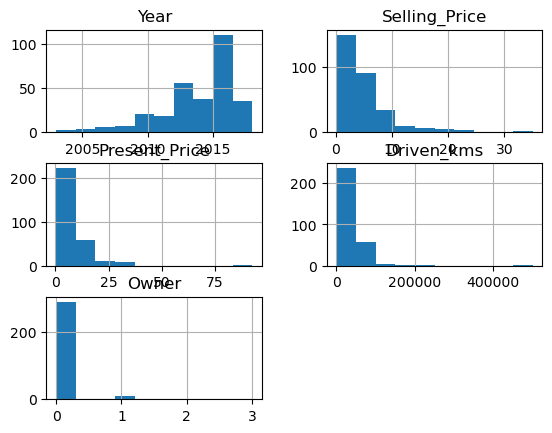

In [7]:

df.hist()

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data=df.fillna(method="bfill")
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
data.corr()

C:\Users\kisho\AppData\Local\Temp\ipykernel_8036\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

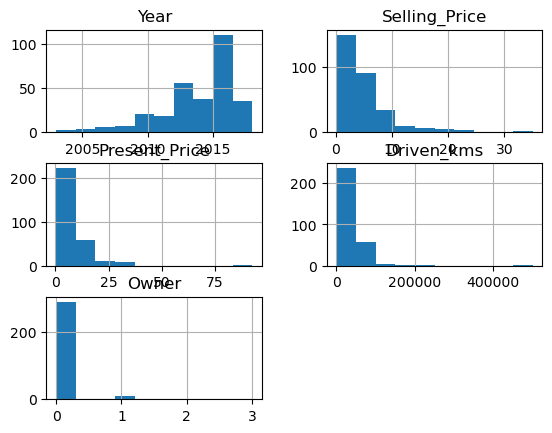

In [16]:
data.hist()

In [23]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:

data.shape

(301, 9)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

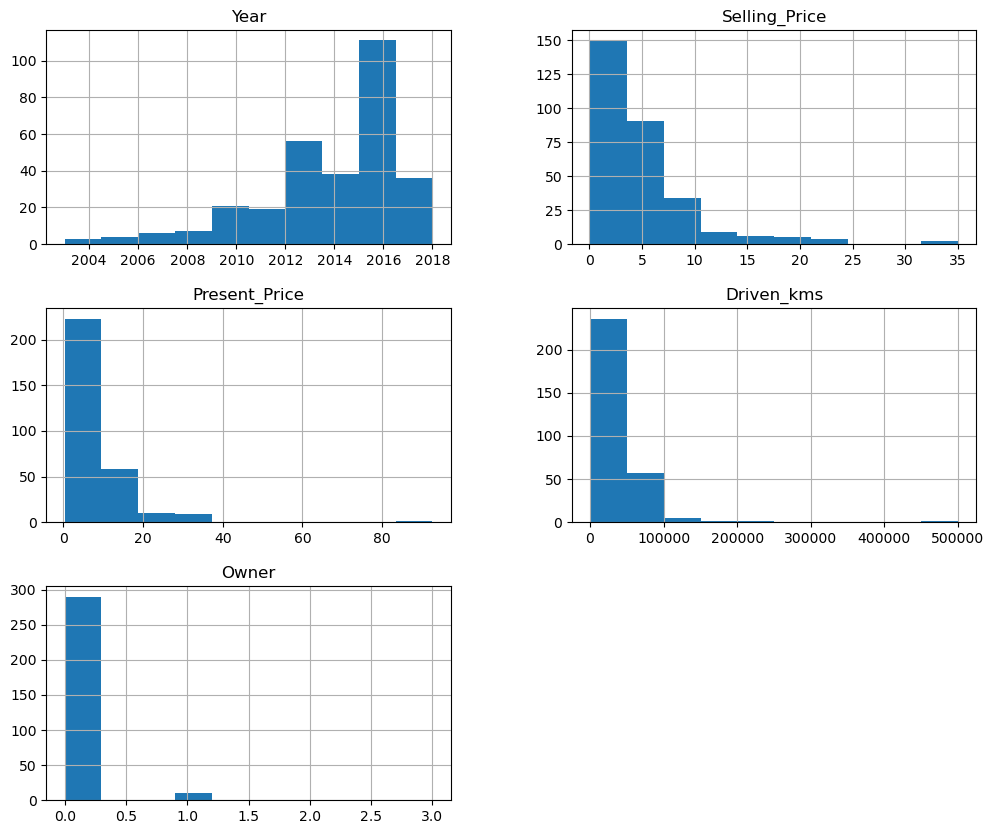

In [25]:
data.hist(figsize=(12,10))

<Axes: >

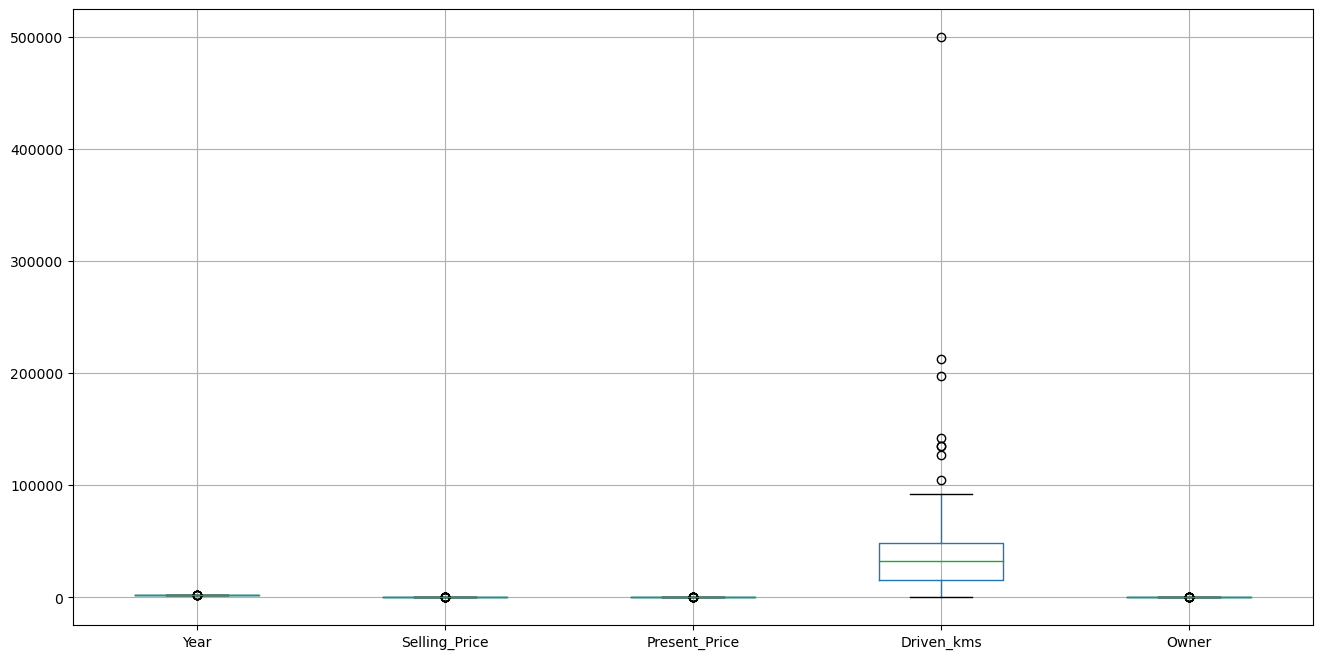

In [26]:
data.boxplot(figsize=(16,8))

C:\Users\kisho\AppData\Local\Temp\ipykernel_8036\3938179260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)


<Axes: >

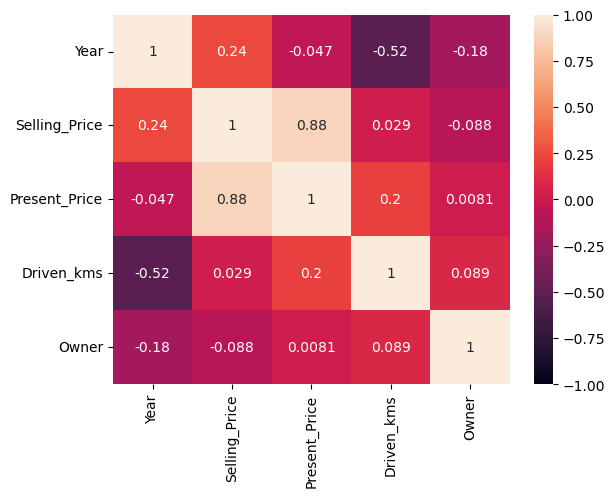

In [29]:

sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

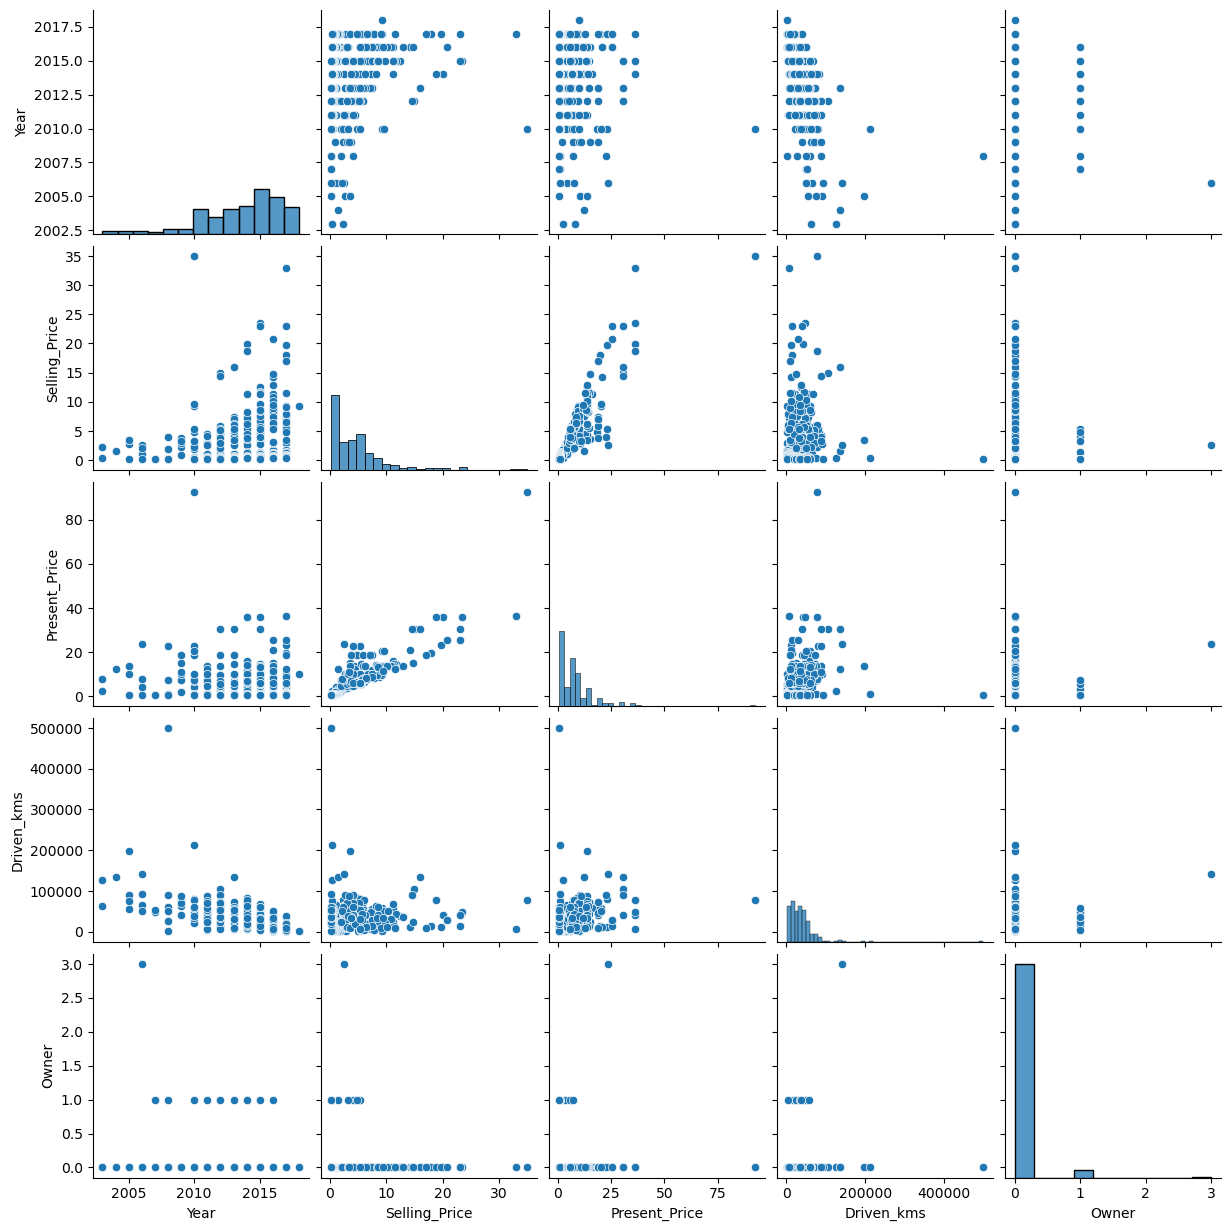

In [30]:
sns.pairplot(data)

In [32]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [33]:
x=data.iloc[:,:-1]
x.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual


In [35]:
y=data.iloc[:,-1:]
y.head(3)

,Owner
0,0
1,0
2,0


# Splitting the data

In [37]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (240, 8)

Training data-y-Shape:	 (240, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (61, 8)

Testing data(y-outcome)shape:	 (61, 1)
